# Drew Anderson lab5 20053277
## I used  64 as the number of disparities and a block size of 5


In [2]:




import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np





Text(0.5, 1.0, 'left tape')

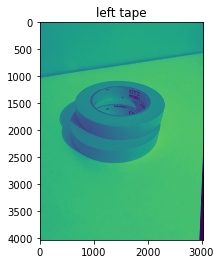

In [3]:
#1.1 reused code from lab4 and and PreLab5
def featureMatching(img1, img2):
    my_SIFT_instance = cv.SIFT_create()

    kp, des = my_SIFT_instance.detectAndCompute(img1, None)
    kp2, des2 = my_SIFT_instance.detectAndCompute(img2, None)

    # BFMatcher from lab 4
    bf = cv.BFMatcher()
    match = bf.knnMatch(des, des2, k=2)
    lowesArry = []

    for x, y in match:
        if (x.distance / y.distance) < 0.8:
            lowesArry.append(x)

    left_pts = np.float32([kp[m.queryIdx].pt for m in lowesArry])

    for i in range(len(left_pts)):
        cv.circle(img1, (int(left_pts[i, 0]), int(left_pts[i, 1])), 2, (255, 0, 255), -1)

    right_pts = np.float32([kp2[m.trainIdx].pt for m in lowesArry])

    for i in range(len(right_pts)):
        cv.circle(img2, (int(right_pts[i, 0]), int(right_pts[i, 1])), 2, (255, 0, 255), -1)
        
        
    img1_pts = np.int32(left_pts)
    img2_pts = np.int32(right_pts)

    matrix, mask = cv.findFundamentalMat(img1_pts, img2_pts, cv.FM_LMEDS)

    # find inlier points
    img1_pts = img1_pts[mask.ravel() == 1]
    img2_pts = img2_pts[mask.ravel() == 1]
  
   
    
        
    return matrix,img1_pts,img2_pts


#1.2    Image rectification & 1.3   Block Matching Disparity Map Calculation
# tape
tape_l = cv.imread("tape_l.jpg", 0)
tape_r= cv.imread("tape_r.jpg", 0)


imsize = (tape_r.shape[1], tape_r.shape[0]) 

matrix, l_pts, r_pts = featureMatching(tape_l,tape_r)

res,H1,H2 = cv.stereoRectifyUncalibrated(l_pts,r_pts,matrix, imsize)

rectified_tape_left = cv.warpPerspective(tape_l, H1, imsize)

rectified_tape_right =  cv.warpPerspective(tape_r, H2, imsize)



plt.imshow(rectified_tape_left,cmap = None)
plt.title("left tape")





Text(0.5, 1.0, 'right tape')

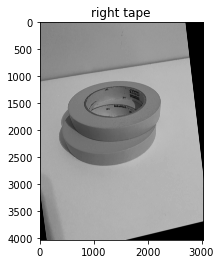

In [4]:
plt.imshow(rectified_tape_right,cmap = '')
plt.title("right tape")

Text(0.5, 1.0, 'disparity map of tape')

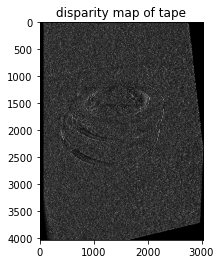

In [4]:
#1.2 and 1.3 output for the coaster
disparity_map = np.zeros((imsize),np.uint8)

stereo = cv.StereoBM_create(numDisparities=64,blockSize=5)

disparity_map=stereo.compute(rectified_tape_left,rectified_tape_right)
plt.imshow(disparity_map, cmap = 'gray')
plt.title("disparity map of tape")

Text(0.5, 1.0, 'rectified coaster left')

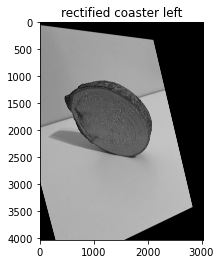

In [5]:
coaster_l = cv.imread("coaster_left.jpg", 0)
coaster_r= cv.imread("coaster_right.jpg", 0)


imsize = (coaster_r.shape[1], coaster_r.shape[0]) 

matrix, l_pts, r_pts = featureMatching(coaster_l,coaster_r)

res,H1,H2 = cv.stereoRectifyUncalibrated(l_pts,r_pts,matrix, imsize)

rectified_coaster_left = cv.warpPerspective(coaster_l, H1, imsize)

rectified_coaster_right =  cv.warpPerspective(coaster_r, H2, imsize)


disparity_map = np.zeros((imsize),np.uint8)

stereo = cv.StereoBM_create(numDisparities=64,blockSize=5)

disparity_map=stereo.compute(rectified_coaster_left,rectified_coaster_right)


plt.imshow(rectified_coaster_left,cmap = 'gray')
plt.title("rectified coaster left")



In [1]:

plt.imshow(rectified_coaster_right,cmap = None)
plt.title("rectified coaster right")


NameError: name 'plt' is not defined

Text(0.5, 1.0, 'disparity map coaster')

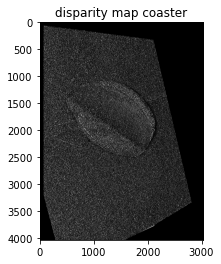

In [7]:

plt.imshow(disparity_map,cmap = 'gray')
plt.title("disparity map coaster")
